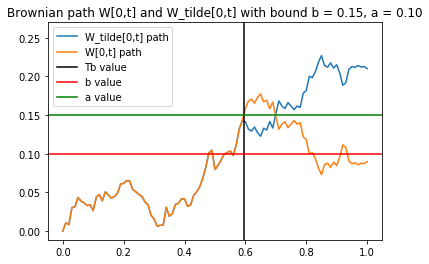

In [1]:
# Apply Euler-method to simulate a Brownian Path W[0, t] with W_0 = 0
# Then plot the Brownian Path W[0,t] and the corresponding path W_tilde[0,t]

import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(1234)

dt = 0.01 # time step
t = 1. # total time
b = 0.15 # bound level
a = 0.1 # the level that should satisfy: W_t < a
flag = 0 # indicates whether the Brownian path reaches bound level
        # 0 means hasn't reached yet, 1 means has reached
s, Ws = 0, 0 # initial time and location of the Brownian Path

# Lists that saparately recorded W[0,t], W_tilde[0,t] and time
W, W_tilde, tPath = [0], [0], [0]

while (s < t):
    # Simulate the new value of Brownian Path
    s = s + dt
    dWs = random.gauss(0, dt)
    Ws += dWs
    # Add updated value W_s and s to record lists
    W.append(Ws)
    tPath.append(s)
    # Check if W_s reaches b (bound level)
    if (Ws >= b and (not flag)):
        # If reaches, record the time that firstly reaches as Tb
        Tb = s - 0.5 * dt
        flag = 1
    # Add updated value W_t_tildas to record lists
    if (flag):
        # W_s has reached bound level, W_s_tilde = 2*b - W_s
        W_tilde.append(2*b - Ws)
    else:
        # W_s hasn't reached bound level, W_s_tilde = W_s
        W_tilde.append(Ws)

# Plot the simulated path
plt.plot(tPath, W_tilde, label = 'W_tilde[0,t] path')
plt.plot(tPath, W, label = 'W[0,t] path')
plt.axvline(x = Tb, color = 'black', label = 'Tb value')
plt.axhline(y = a, color = 'red', label = 'b value')
plt.axhline(y = b, color = 'green', label = 'a value')
plt.title("Brownian path W[0,t] and W_tilde[0,t] with bound b = 0.15, a = 0.10")
plt.ylim(top = 0.27)
plt.legend()
plt.show()